# QSAR Model Building of Acetylcholinesterase Inhibitors

## Read in data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.337242
8124,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.416688
8125,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.767004
8126,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000


In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8124,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8125,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8126,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
8123    4.337242
8124    4.416688
8125    5.767004
8126    5.000000
8127    5.000000
Name: pIC50, Length: 8128, dtype: float64

# Remove low variance features

In [5]:

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP37,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,1,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,1,0,1,0,0,0,1,1,1,0,...,0,1,0,1,0,1,1,1,0,1
8124,0,0,1,0,0,0,1,1,1,0,...,1,1,0,1,0,1,1,0,1,1
8125,1,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8126,1,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X.to_csv('descriptor_list.csv', index = False)

In [7]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [8]:
Y = Y.replace([np.inf, -np.inf], np.nan)

In [9]:
Y = Y.fillna(Y.median())  # Use median (or mean if you prefer)

In [10]:
Y = Y.astype(np.float64)

In [11]:
X = X.loc[Y.index] 

In [12]:
print("Inf in X:", np.isinf(X).sum().sum())  # Check for inf
print("NaN in X:", np.isnan(X).sum().sum())  # Check for NaN

Inf in X: 0
NaN in X: 0


In [13]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.7126005179472348

# Model Prediction

In [14]:
Y_pred = model.predict(X)
Y_pred

array([5.35057876, 6.7635975 , 5.2366861 , ..., 5.60300355, 5.24838191,
       5.20130129])

# Model Performance

In [15]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.72
Coefficient of determination (R^2): 0.71


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

Text(0.5, 0, 'Experimental pIC50')

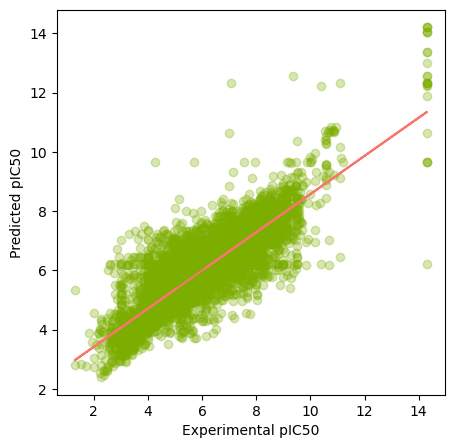

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [17]:
import pickle

In [18]:
pickle.dump(model, open('acetylcholinesterase_model.pkl', 'wb'))